# Download Urban Parcels Data for Austria

In [1]:
# https://urbantaxonomy.org/data.html

In [2]:
import json

data = {
    "1": {
        "1": "Incoherent Fabric",
        "2": "Coherent Fabric"
    },
    "2": {
        "1": "Incoherent Large-Scale Fabric",
        "2": "Incoherent Small-Scale Fabric",
        "3": "Coherent Interconnected Fabric",
        "4": "Coherent Dense Fabric"
    },
    "3": {
        "1": "Incoherent Large-Scale Homogeneous Fabric",
        "2": "Incoherent Large-Scale Heterogeneous Fabric",
        "3": "Incoherent Small-Scale Linear Fabric",
        "4": "Incoherent Small-Scale Sparse Fabric",
        "5": "Incoherent Small-Scale Compact Fabric",
        "6": "Coherent Interconnected Fabric",
        "7": "Coherent Dense Disjoint Fabric",
        "8": "Coherent Dense Adjacent Fabric"
    }
}

with open("8_label_name.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4, ensure_ascii=False)


In [31]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import osmnx as ox
import re
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as cx

# Data Parsing (Cleaning & Preprocessing)

<Axes: >

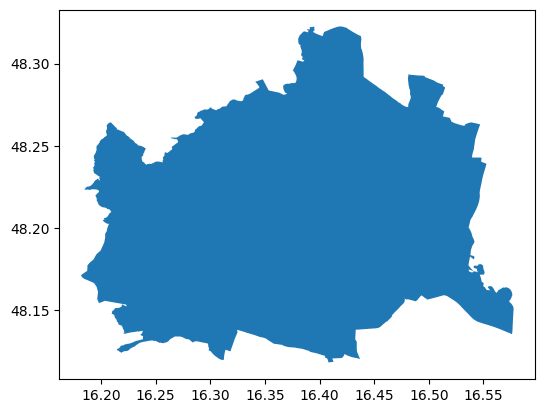

In [4]:
admin = ox.geocode_to_gdf('Vienna')
admin.plot()

In [6]:
df = pd.read_parquet('8- at1.parquet') # building footprint polygons
print(len(df))
df.head(3)

1627035


,geometry,morphotope_id,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,bbox
87615_4039,"[[{'x': 4753045.085397144, 'y': 2741806.671431...",87615_221_-223,True,1,2,4,6,9,18,36,"{'xmin': 4753045.085397144, 'ymin': 2741795.72..."
82064_29748,"[[{'x': 4729753.175843233, 'y': 2754947.380780...",82064_861_-866,True,1,2,3,4,7,15,31,"{'xmin': 4729753.175843233, 'ymin': 2754945.35..."
82064_30063,"[[{'x': 4729729.3576677665, 'y': 2754960.66960...",82064_861_-866,True,1,2,3,4,7,15,31,"{'xmin': 4729729.3576677665, 'ymin': 2754949.3..."


In [8]:
type(df.geometry.to_list()[0]) # geometry is stored as an array so it is not yet a polygon

numpy.ndarray

In [10]:
# Turn records into polygons

def parse_geometry(geom):
    coords = [(p['x'], p['y']) for p in geom[0] if 'x' in p and 'y' in p]
    return Polygon(coords) if len(coords) >= 3 else None

df['geometry'] = df['geometry'].apply(parse_geometry)
display(df.head(3))
df.geometry.to_list()[0:1]

,geometry,morphotope_id,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,bbox
87615_4039,"POLYGON ((4753045.085397144 2741806.671431327,...",87615_221_-223,True,1,2,4,6,9,18,36,"{'xmin': 4753045.085397144, 'ymin': 2741795.72..."
82064_29748,"POLYGON ((4729753.175843233 2754947.38078037, ...",82064_861_-866,True,1,2,3,4,7,15,31,"{'xmin': 4729753.175843233, 'ymin': 2754945.35..."
82064_30063,POLYGON ((4729729.3576677665 2754960.669603443...,82064_861_-866,True,1,2,3,4,7,15,31,"{'xmin': 4729729.3576677665, 'ymin': 2754949.3..."


[<POLYGON ((4753045.085 2741806.671, 4753054.879 2741810.198, 4753058.791 274...>]

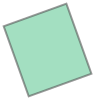

In [11]:
df.geometry.to_list()[0]

In [13]:
# Convert df into gdf

gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:3035') # CRS in Europe
gdf = gdf.to_crs(4326)

In [15]:
# Get polygons in Vienna only
gdf = gpd.overlay(gdf, admin[['geometry']])
len(gdf)

247464

<Axes: >

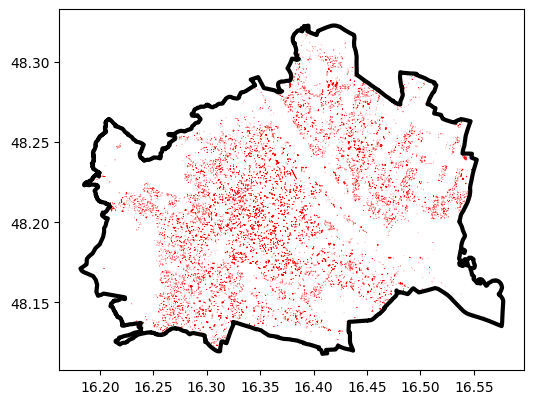

In [17]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
gdf.sample(10000).plot(ax=ax, edgecolor='r', linewidth=0.5)
admin.plot(ax=ax, color='None', edgecolor='k', linewidth=3)

<Axes: >

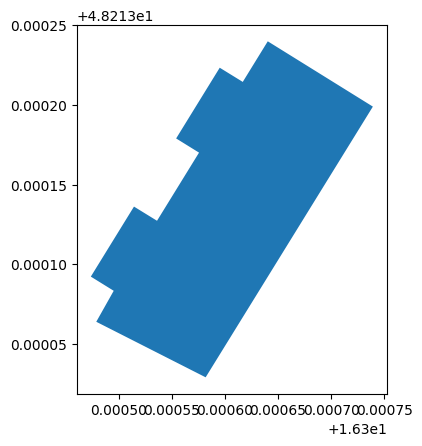

In [18]:
gdf.sample(1).plot()

In [19]:
gdf

,morphotope_id,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,bbox,geometry
0,86873_3_1263,False,1,1,1,1,2,3,4,"{'xmin': 4801402.190174865, 'ymin': 2802107.38...","POLYGON ((16.46179 48.14339, 16.46181 48.14337..."
1,86873_3_1263,False,1,1,1,1,2,3,4,"{'xmin': 4801399.927677627, 'ymin': 2802099.07...","POLYGON ((16.46169 48.1432, 16.46172 48.14318,..."
2,86873_3_1263,False,1,1,1,1,2,3,4,"{'xmin': 4801397.050669057, 'ymin': 2802085.66...","POLYGON ((16.46162 48.14311, 16.46164 48.14309..."
3,86873_3_1263,False,1,1,1,1,2,3,4,"{'xmin': 4801391.657635587, 'ymin': 2802073.55...","POLYGON ((16.46152 48.14295, 16.46154 48.14294..."
4,86873_3_1263,False,1,1,1,1,2,3,4,"{'xmin': 4801349.203179351, 'ymin': 2802052.22...","POLYGON ((16.46097 48.14285, 16.46102 48.14281..."
...,...,...,...,...,...,...,...,...,...,...,...
247459,86873_64_-92,True,1,2,3,4,6,10,21,"{'xmin': 4809830.6503231255, 'ymin': 2802172.3...","POLYGON ((16.57462 48.13718, 16.57471 48.13715..."
247460,86873_64_-92,True,1,2,3,4,6,10,21,"{'xmin': 4809852.99694567, 'ymin': 2802165.978...","POLYGON ((16.5749 48.13707, 16.57493 48.13706,..."
247461,86873_64_-92,True,1,2,3,4,6,10,21,"{'xmin': 4809956.132758252, 'ymin': 2802134.17...","POLYGON ((16.57625 48.13673, 16.5763 48.13671,..."
247462,86873_81_-108,True,1,2,3,4,6,10,21,"{'xmin': 4809918.128285589, 'ymin': 2802689.11...","POLYGON ((16.57645 48.14174, 16.57648 48.14169..."


In [20]:
# Turn the labels into something readable using the json file

with open('8_label_name.json', 'r') as f:
    label_dict = json.load(f)
label_dict

{'1': {'1': 'Incoherent Fabric', '2': 'Coherent Fabric'},
 '2': {'1': 'Incoherent Large-Scale Fabric',
  '2': 'Incoherent Small-Scale Fabric',
  '3': 'Coherent Interconnected Fabric',
  '4': 'Coherent Dense Fabric'},
 '3': {'1': 'Incoherent Large-Scale Homogeneous Fabric',
  '2': 'Incoherent Large-Scale Heterogeneous Fabric',
  '3': 'Incoherent Small-Scale Linear Fabric',
  '4': 'Incoherent Small-Scale Sparse Fabric',
  '5': 'Incoherent Small-Scale Compact Fabric',
  '6': 'Coherent Interconnected Fabric',
  '7': 'Coherent Dense Disjoint Fabric',
  '8': 'Coherent Dense Adjacent Fabric'}}

In [22]:
for level_num in ['1', '2', '3']:
    label_col = f"level_{level_num}_label"
    name_col = f"level_{level_num}_name"
    if label_col in gdf.columns:
        gdf[name_col] = gdf[label_col].astype(str).map(label_dict[level_num])

gdf[['level_1_name', 'level_2_name', 'level_3_name']].drop_duplicates()

,level_1_name,level_2_name,level_3_name
0,Incoherent Fabric,Incoherent Large-Scale Fabric,Incoherent Large-Scale Homogeneous Fabric
6,Incoherent Fabric,Incoherent Small-Scale Fabric,Incoherent Small-Scale Compact Fabric
14,Incoherent Fabric,Incoherent Small-Scale Fabric,Incoherent Small-Scale Linear Fabric
55,Incoherent Fabric,Incoherent Large-Scale Fabric,Incoherent Large-Scale Heterogeneous Fabric
168,Coherent Fabric,Coherent Dense Fabric,Coherent Dense Disjoint Fabric
169,Coherent Fabric,Coherent Dense Fabric,Coherent Dense Adjacent Fabric
300,Incoherent Fabric,Incoherent Small-Scale Fabric,Incoherent Small-Scale Sparse Fabric
352,Coherent Fabric,Coherent Interconnected Fabric,Coherent Interconnected Fabric


In [23]:
for level_num in ['1', '2', '3']:
    print(len(set(gdf[f"level_{level_num}_name"])))

2
4
8


# Visualization of a Location

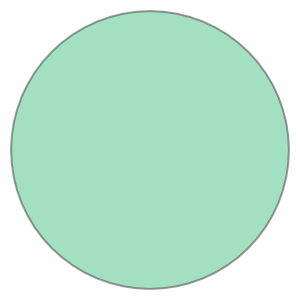

In [24]:
center_wgs84 = Point(16.3738, 48.2082) # Choose a loc in Vienna
center = gpd.GeoSeries([center_wgs84], crs="EPSG:4326").to_crs(3035).iloc[0] # Turn into meters

# Turn the point into a circle by buffering
radius = 2500
circle = center.buffer(radius)
circle 

<Axes: >

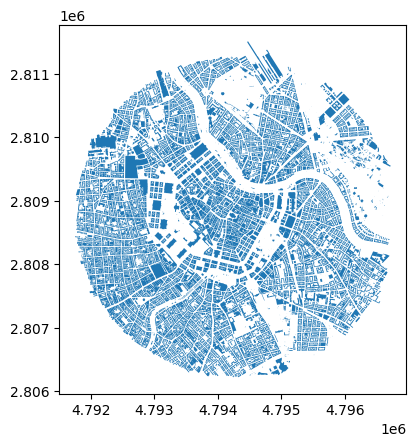

In [26]:
# Convert gdf to local europe proj
gdf_loc = gdf.to_crs(3035)

# Restrict the dataset to the circle
gdf_circle = gdf_loc[gdf_loc.intersects(circle)]
gdf_circle.plot()

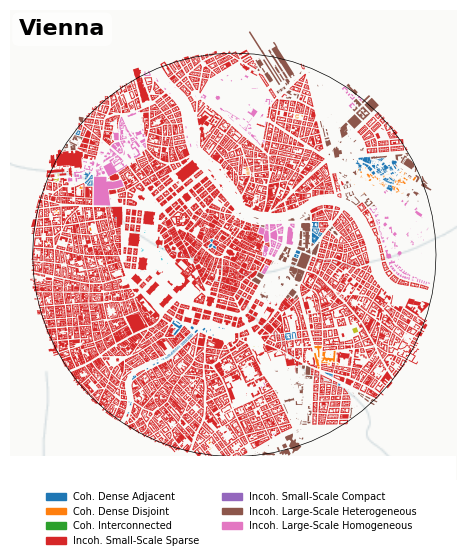

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))

gdf_circle.plot(column='level_3_name', ax=ax, legend=False)
gpd.GeoSeries([circle], crs=gdf.crs).boundary.plot(ax=ax, color='black', linewidth=0.5)

ax.set_aspect('equal')
ax.set_axis_off()

# styling for title vienna
ax.text(
    0.02, 0.98, 'Vienna',
    transform=ax.transAxes,
    ha='left', va='top', 
    fontsize=16, fontweight='bold',
    color='black', 
    bbox=dict(
        facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round, pad=0.3'
    )
)

# basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zoom=13)

ax.add_patch(plt.Rectangle(
    (0,0), 1, 0.05,
    transform=ax.transAxes,
    color='white', zorder=10, alpha=1, lw=0
))



# Add Legend
unique_labels = sorted(gdf_circle['level_3_name'].dropna().unique())

# Redefine in order
preferred_order = [
 'Coherent Dense Adjacent Fabric',
 'Coherent Dense Disjoint Fabric',
 'Coherent Interconnected Fabric',
 'Incoherent Small-Scale Sparse Fabric',
 'Incoherent Small-Scale Compact Fabric',
 'Incoherent Large-Scale Heterogeneous Fabric',
 'Incoherent Large-Scale Homogeneous Fabric'
]

unique_labels = [lbl for lbl in preferred_order if lbl in unique_labels]

clean_labels = [
    lbl.replace('Fabric', '')
       .replace('Incoherent', 'Incoh.')
       .replace('Coherent', 'Coh.')
    for lbl in unique_labels
]

# Color for each label
colors = [plt.cm.tab10(i % 10) for i in range(len(unique_labels))]
patches = [mpatches.Patch(color=c, label=l) for c, l in zip(colors, clean_labels)]

fig.legend(
    handles=patches, 
    loc='lower center', 
    ncol=2,
    frameon=False,
    fontsize=7,
    bbox_to_anchor=(0.5, -0.12)
)

plt.tight_layout()

# Series of Visuals

In [41]:
def plot_morphology(title, location, gdf, radius=2500):
    # Define location and crs
    center_wgs84 = Point(location[0], location[1]) 
    center = gpd.GeoSeries([center_wgs84], crs="EPSG:4326").to_crs(3035).iloc[0]
    circle = center.buffer(radius)

    # Clip the GDF
    gdf_loc = gdf.to_crs(3035)
    gdf_circle = gdf_loc[gdf_loc.intersects(circle)]

    # Plot map
    fig, ax = plt.subplots(figsize=(5, 5))
    gdf_circle.plot(column='level_3_name', ax=ax, legend=False)
    gpd.GeoSeries([circle], crs=gdf.crs).boundary.plot(ax=ax, color='black', linewidth=0.5, aspect=None)
    
    ax.set_aspect('equal')
    ax.set_axis_off()
    
    # styling for title vienna
    ax.text(
        0.02, 0.98, title,
        transform=ax.transAxes,
        ha='left', va='top', 
        fontsize=16, fontweight='bold',
        color='black', 
        bbox=dict(
            facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round, pad=0.3'
        )
    )
    
    # basemap
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zoom=13)
    
    ax.add_patch(plt.Rectangle(
        (0,0), 1, 0.05,
        transform=ax.transAxes,
        color='white', zorder=10, alpha=1, lw=0
    ))
    
    
    
    # Add Legend
    unique_labels = sorted(gdf_circle['level_3_name'].dropna().unique())
    
    # Redefine in order
    preferred_order = [
     'Coherent Dense Adjacent Fabric',
     'Coherent Dense Disjoint Fabric',
     'Coherent Interconnected Fabric',
     'Incoherent Small-Scale Sparse Fabric',
     'Incoherent Small-Scale Compact Fabric',
     'Incoherent Large-Scale Heterogeneous Fabric',
     'Incoherent Large-Scale Homogeneous Fabric'
    ]
    
    unique_labels = [lbl for lbl in preferred_order if lbl in unique_labels]
    
    clean_labels = [
        lbl.replace('Fabric', '')
           .replace('Incoherent', 'Incoh.')
           .replace('Coherent', 'Coh.')
        for lbl in unique_labels
    ]
    
    # Color for each label
    colors = [plt.cm.tab10(i % 10) for i in range(len(unique_labels))]
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(colors, clean_labels)]
    
    fig.legend(
        handles=patches, 
        loc='lower center', 
        ncol=2,
        frameon=False,
        fontsize=7,
        bbox_to_anchor=(0.5, -0.12)
    )
    
    plt.tight_layout()
    plt.show()

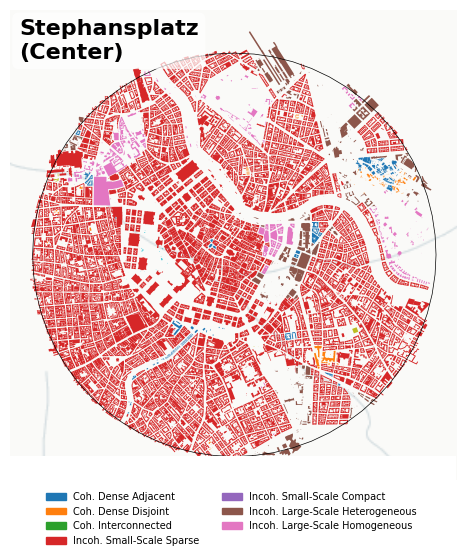

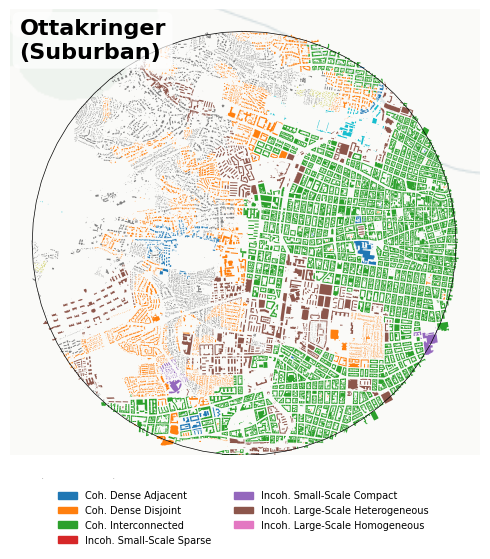

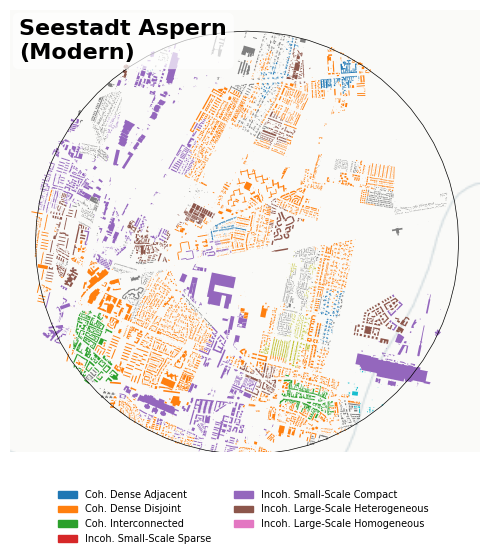

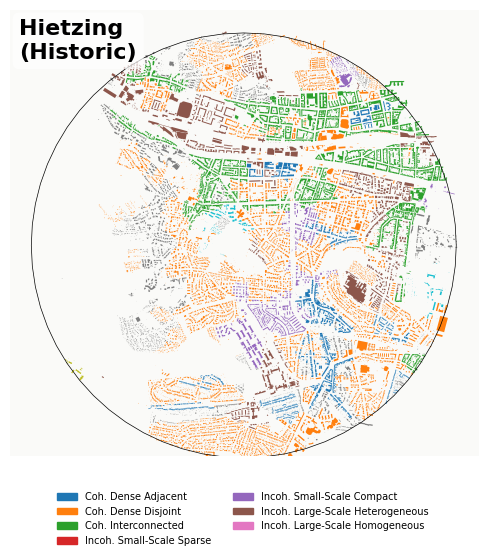

In [43]:
locations = [
    ('Stephansplatz\n(Center)', (16.3738, 48.2082)),
    ('Ottakringer\n(Suburban)', (16.3045, 48.2142)),
    ('Seestadt Aspern\n(Modern)', (16.4805, 48.2345)),
    ('Hietzing\n(Historic)', (16.2735, 48.1832))
]

for title, loc in locations:
    plot_morphology(title, loc, gdf)

# Applying on Beirut

<Axes: >

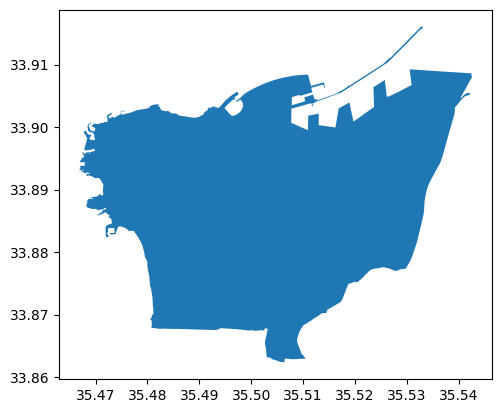

In [44]:
admin = ox.geocode_to_gdf('Beirut')
admin.plot()

In [102]:
gdf = gpd.read_file(r"C:\Users\User\Downloads\Beirut Parcels\Parcel_BBD_Beirutmap.shp") 
print(len(gdf))
gdf.head(3)

21143


,OBJECTID_1,PID,POINT_X,POINT_Y,dip,GlobalID,geometry
0,1,Mo_3695,729536.8371,3.750431e+06,0,99bde931-eefd-4285-93db-fe389321b571,"POLYGON Z ((729569.967 3750418.359 0, 729512.5..."
1,2,Mo_3696,729546.6323,3.750402e+06,0,7f2d1ea1-0bf6-4fc5-b7da-b141c97828e9,"POLYGON Z ((729571.214 3750399.178 0, 729571.5..."
2,3,Mo_3665,729552.0118,3.750342e+06,0,37c179f3-b6e8-46f4-ac8c-481301ebe4d9,"POLYGON Z ((729573.818 3750371.705 0, 729576.6..."


In [103]:
type(df.geometry.to_list()[0])

shapely.geometry.polygon.Polygon

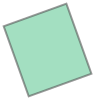

In [104]:
df.geometry.to_list()[0]

In [105]:
print(gdf.crs)

EPSG:32636


In [106]:
gdf = gdf.to_crs(4326)
gdf

,OBJECTID_1,PID,POINT_X,POINT_Y,dip,GlobalID,geometry
0,1,Mo_3695,729536.8371,3.750431e+06,0,99bde931-eefd-4285-93db-fe389321b571,"POLYGON Z ((35.48183 33.86914 0, 35.48121 33.8..."
1,2,Mo_3696,729546.6323,3.750402e+06,0,7f2d1ea1-0bf6-4fc5-b7da-b141c97828e9,"POLYGON Z ((35.48184 33.86896 0, 35.48184 33.8..."
2,3,Mo_3665,729552.0118,3.750342e+06,0,37c179f3-b6e8-46f4-ac8c-481301ebe4d9,"POLYGON Z ((35.48186 33.86872 0, 35.48188 33.8..."
3,4,Mo_3668,729553.5755,3.750267e+06,0,141a8390-f156-43ec-bcc4-aa6d1fc004f4,"POLYGON Z ((35.48191 33.86805 0, 35.48195 33.8..."
4,5,Mo_3682,729616.6358,3.750436e+06,0,88cf5912-2a6e-4970-aca4-8afcae0ceff6,"POLYGON Z ((35.48275 33.86933 0, 35.48276 33.8..."
...,...,...,...,...,...,...,...
21138,0,Mi_1401,0.0000,0.000000e+00,0,bbdd1f2d-90e1-4f04-98f1-a060c0d2bf32,"POLYGON Z ((35.49751 33.90088 0, 35.49751 33.9..."
21139,0,Ac_5110,0.0000,0.000000e+00,0,5249d7ba-1a53-4a86-ad13-a6173a52dc89,"POLYGON Z ((35.5313 33.8835 0, 35.5313 33.8833..."
21140,0,Mo_1861,0.0000,0.000000e+00,0,912a76c8-dabe-4646-9bf2-e589b31e1b48,"POLYGON Z ((35.49438 33.89315 0, 35.49435 33.8..."
21141,0,Ac_1248,0.0000,0.000000e+00,0,8b25fda8-971d-4326-88ba-2dd0a0f9ab6d,"POLYGON Z ((35.51054 33.88737 0, 35.51053 33.8..."


In [107]:
# Get polygons in Beirut only
gdf = gpd.overlay(gdf, admin[['geometry']])
len(gdf)

21131

<Axes: >

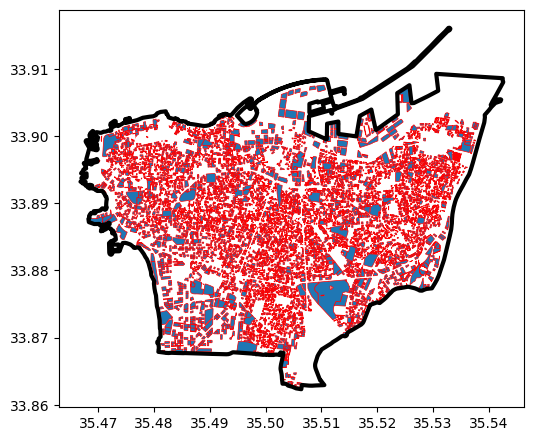

In [108]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
gdf.sample(10000).plot(ax=ax, edgecolor='r', linewidth=0.5)
admin.plot(ax=ax, color='None', edgecolor='k', linewidth=3)

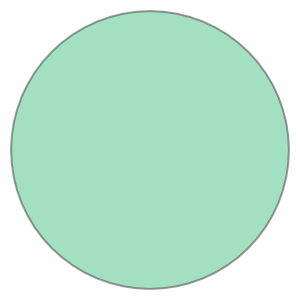

In [116]:
center_wgs84 = Point(35.5018, 33.8938) 
center = gpd.GeoSeries([center_wgs84], crs="EPSG:4326").to_crs(32636).iloc[0] # Turn into meters

# Turn the point into a circle by buffering
radius = 1000
circle = center.buffer(radius)
circle 

<Axes: >

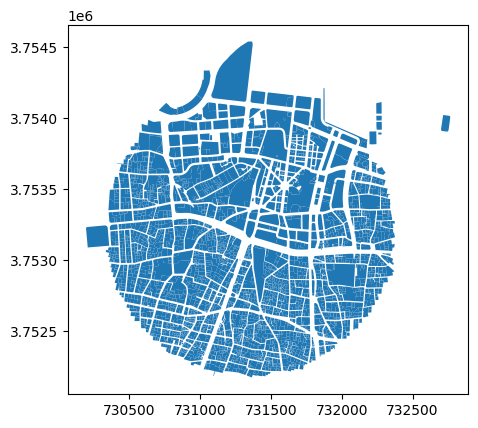

In [117]:
# Convert gdf to meters
gdf_loc = gdf.to_crs(32636)

# Restrict the dataset to the circle
gdf_circle = gdf_loc[gdf_loc.intersects(circle)]
gdf_circle.plot()

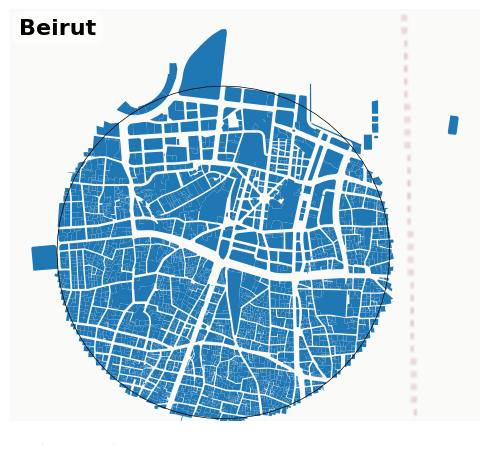

In [121]:
fig, ax = plt.subplots(figsize=(5, 5))

gdf_circle.plot(ax=ax, legend=False)
gpd.GeoSeries([circle], crs=gdf_circle.crs).boundary.plot(ax=ax, color='black', linewidth=0.5)

ax.set_aspect('equal')
ax.set_axis_off()

# title
ax.text(
    0.02, 0.98, 'Beirut',
    transform=ax.transAxes,
    ha='left', va='top', 
    fontsize=16, fontweight='bold',
    color='black', 
    bbox=dict(
        facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round, pad=0.3'
    )
)

# basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zoom=13)

ax.add_patch(plt.Rectangle(
    (0,0), 1, 0.05,
    transform=ax.transAxes,
    color='white', zorder=10, alpha=1, lw=0
))


plt.tight_layout()